In [1]:
import numpy as np
import pandas as pd
from scipy import optimize 
from scipy.optimize import linprog

In [2]:
#function obtains maximal return portfolio using linear programming

def MaximizeReturns(MeanReturns, PortfolioSize):
    
    #dependencies
    
    
    c = (np.multiply(-1, MeanReturns))
    A = np.ones([PortfolioSize,1]).T
    # print(c.shape)
    # print(A.shape)
    b=[1]
    res = linprog(c, A_ub = A, b_ub = b, bounds = (0,1), method = 'simplex') 
    
    return res

In [11]:
#function obtains minimal risk portfolio 

#dependencies

def MinimizeRisk(CovarReturns, PortfolioSize):
    
    def f(x, CovarReturns):
        func = np.matmul(np.matmul(x, CovarReturns), x.T) 
        return func

    def constraintEq(x):
        A = np.ones(x.shape)
        b = 1
        constraintVal = np.matmul(A, x.T) - b 
        return constraintVal
    
    xinit = np.repeat(0.1, PortfolioSize)
    cons = ({'type': 'eq', 'fun': constraintEq})
    lb = 0
    ub = 1
    bnds = tuple([(lb, ub) for x in xinit])

    opt = optimize.minimize(f, x0=xinit, args=(CovarReturns), bounds=bnds, \
                             constraints=cons, tol=10**-3)
    
    return opt

In [4]:
#function obtains Minimal risk and Maximum return portfolios

#dependencies


def MinimizeRiskConstr(MeanReturns, CovarReturns, PortfolioSize, R):
    
    def  f(x,CovarReturns):
         
        func = np.matmul(np.matmul(x,CovarReturns ), x.T)
        return func

    def constraintEq(x):
        AEq=np.ones(x.shape)
        bEq=1
        EqconstraintVal = np.matmul(AEq,x.T)-bEq 
        return EqconstraintVal
    
    def constraintIneq(x, MeanReturns, R):
        AIneq = np.array(MeanReturns)
        bIneq = R
        IneqconstraintVal = np.matmul(AIneq,x.T) - bIneq
        return IneqconstraintVal
    

    xinit=np.repeat(0.1, PortfolioSize)
    cons = ({'type': 'eq', 'fun':constraintEq},
            {'type':'ineq', 'fun':constraintIneq, 'args':(MeanReturns,R) })
    lb = 0
    ub = 1
    bnds = tuple([(lb,ub) for x in xinit])

    opt = optimize.minimize (f, args = (CovarReturns), method ='trust-constr',  \
                        x0 = xinit,   bounds = bnds, constraints = cons, tol = 10**-3)
    
    return  opt

In [5]:
# function computes asset returns 
def StockReturnsComputing(StockPrice, Rows, Columns):
    
    import numpy as np
    
    StockReturn = np.zeros([Rows-1, Columns])
    for j in range(Columns):        # j: Assets
        for i in range(Rows-1):     # i: Daily Prices
            StockReturn[i,j]=((StockPrice[i+1, j]-StockPrice[i,j])/StockPrice[i,j])* 100

    return StockReturn

In [6]:
# Obtain optimal portfolio sets that maximize return and minimize risk

#Dependencies



#input k-portfolio 1 dataset comprising 15 stocks
StockFileName = 'dataset.csv'




#read stock prices in a dataframe
df = pd.read_csv(StockFileName,  index_col=0)
Rows = df.shape[0] - 1
Columns = df.shape[1] - 1  #excluding date
portfolioSize = Columns #set portfolio size
#print(df.head())
print(df.shape)

#extract asset labels
assetLabels = df.columns[1:Columns+1].tolist()
print(len(assetLabels))
print(assetLabels)

#extract asset prices
StockData = df.iloc[0:, 1:]
print(StockData.shape)


#compute asset returns
arStockPrices = np.asarray(StockData)
[Rows, Cols]=arStockPrices.shape
arReturns = StockReturnsComputing(arStockPrices, Rows, Cols)


#compute mean returns and variance covariance matrix of returns
meanReturns = np.mean(arReturns, axis = 0)
covReturns = np.cov(arReturns, rowvar=False)

#set precision for printing results
np.set_printoptions(precision=3, suppress = True)

#display mean returns and variance-covariance matrix of returns
print('Mean returns of assets in k-portfolio 1\n', meanReturns)
print('Variance-Covariance matrix of returns\n', covReturns)

(1630, 69)
68
['BOB', 'BOI', 'CBI', 'City Union', 'DCB', 'Federal', 'HDFC', 'ICICI', 'Kotak', 'PNB', 'RBL', 'SBI', 'UCO', 'Union Bank', 'Yes Bank', 'Bajaj Finance', 'Bajaj Finserv', 'BF investment', 'Cholmandalam Finance Holding', 'edelweiss', 'IDFC', 'HDFC fin', 'KILC', 'LT', 'Motilal Oswal', 'Reliance Capital', 'SBI.1', 'Shriram Finance', 'Tata Investment', 'HCL info', 'HCL tech', 'Infosys', 'Mphasis', 'Naukri', 'Oracle', 'TCS', 'Tech Mahindra', 'Wipro', 'Aarti', 'Ajanta Pharma', 'Alembic', 'Biocon', 'Cipla', 'Dr. Reddys', 'Indoco', 'JB', 'Lupin', 'Natco', 'Panacea', 'Piramal', 'Sun', 'Aditya Birla Fashion', 'Future Lifestyle', 'PC jewellers', 'Future', 'rajesh exports', 'Shoppers Stop', 'Titan', 'Trent', 'Arvind', 'Bombay Dyeing', 'Grasim', 'KPR Mill', 'Page Ind', 'Raymond', 'SRF', 'Vardhman', 'Welspun']
(1630, 68)
Mean returns of assets in k-portfolio 1
 [ 0.025  0.065  0.138  0.029  0.028 -0.01   0.014 -0.062 -0.041  0.083
  0.075 -0.029  0.067  0.071  0.525 -0.1    0.471  0.007  

In [7]:
#Maximal expected portfolio return computation for the k-portfolio
result1 = MaximizeReturns(meanReturns, portfolioSize)
maxReturnWeights = result1.x
maxExpPortfolioReturn = np.matmul(meanReturns.T, maxReturnWeights)
print("Maximal Expected Portfolio Return:   %7.4f" % maxExpPortfolioReturn )

Maximal Expected Portfolio Return:    0.5248


C:\Users\DELL\AppData\Local\Temp\ipykernel_20116\3027689823.py:13: DeprecationWarning: `method='simplex'` is deprecated and will be removed in SciPy 1.11.0. Please use one of the HiGHS solvers (e.g. `method='highs'`) in new code.
  res = linprog(c, A_ub = A, b_ub = b, bounds = (0,1), method = 'simplex')


In [8]:
#expected portfolio return computation for the minimum risk k-portfolio 
result2 = MinimizeRisk(covReturns, portfolioSize)
minRiskWeights = result2.x
minRiskExpPortfolioReturn = np.matmul(meanReturns.T, minRiskWeights)
print("Expected Return of Minimum Risk Portfolio:  %7.4f" % minRiskExpPortfolioReturn)

Expected Return of Minimum Risk Portfolio:   0.0222


In [9]:
#compute efficient set for the maximum return and minimum risk portfolios
increment = 0.001
low = minRiskExpPortfolioReturn
high = maxExpPortfolioReturn

#initialize optimal weight set and risk-return point set
xOptimal =[]
minRiskPoint = []
expPortfolioReturnPoint =[]

#repeated execution of function MinimizeRiskConstr to determine the efficient set 
while (low < high):
    
    result3 = MinimizeRiskConstr(meanReturns, covReturns, portfolioSize, low)
    xOptimal.append(result3.x)
    expPortfolioReturnPoint.append(low)
    low = low+increment
    
#gather optimal weight set    
xOptimalArray = np.array(xOptimal)

#obtain annualized risk for the efficient set portfolios 
#for trading days = 251
minRiskPoint = np.diagonal(np.matmul((np.matmul(xOptimalArray,covReturns)),\
                                     np.transpose(xOptimalArray)))
riskPoint =   np.sqrt(minRiskPoint*251) 

#obtain expected portfolio annualized return for the 
#efficient set portfolios, for trading days = 251
retPoint = 251*np.array(expPortfolioReturnPoint) 

#display efficient set portfolio parameters
print("Size of the  efficient set:", xOptimalArray.shape )
print("Optimal weights of the efficient set portfolios: \n", xOptimalArray)
print("Annualized Risk and Return of the efficient set portfolios: \n", \
                                                np.c_[riskPoint, retPoint])

c:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\optimize\_hessian_update_strategy.py:182: UserWarning: delta_grad == 0.0. Check if the approximated function is linear. If the function is linear better results can be obtained by defining the Hessian as zero instead of using quasi-Newton approximations.
  warn('delta_grad == 0.0. Check if the approximated '


Size of the  efficient set: (503, 68)
Optimal weights of the efficient set portfolios: 
 [[ 0.008  0.01   0.011 ...  0.008  0.009  0.008]
 [ 0.008  0.01   0.011 ...  0.008  0.009  0.008]
 [ 0.008  0.01   0.011 ...  0.008  0.009  0.008]
 ...
 [-0.    -0.    -0.    ... -0.    -0.    -0.   ]
 [-0.    -0.    -0.    ... -0.    -0.    -0.   ]
 [-0.    -0.    -0.    ... -0.    -0.    -0.   ]]
Annualized Risk and Return of the efficient set portfolios: 
 [[ 16.092   5.566]
 [ 16.091   5.817]
 [ 16.09    6.068]
 ...
 [159.161 131.066]
 [159.85  131.317]
 [166.999 131.568]]


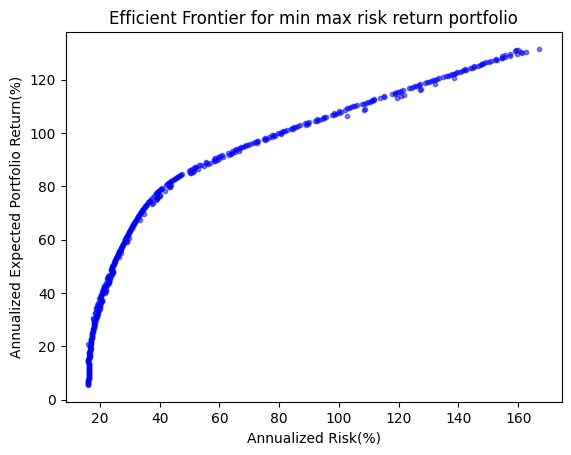

In [13]:
#Graph Efficient Frontier
import matplotlib.pyplot as plt

NoPoints = riskPoint.size

colours = "blue"
area = np.pi*3

plt.title('Efficient Frontier for min max risk return portfolio')
plt.xlabel('Annualized Risk(%)')
plt.ylabel('Annualized Expected Portfolio Return(%)' )
plt.scatter(riskPoint, retPoint, s=area, c=colours, alpha =0.5)
plt.show()